**Methods**:

We plan to create scatter plots colour coded for class for each variable pair to visualise our data and figure out which variable pair best predicts whether a star is a pulsar.

1. Load the libraries tidyverse, tidymodels, repr and ggplot2.

2. Read the data from the web using the read_csv() function.

(i) Add column names to the dataframe using the mutate() function

(ii) Change the class to a categorical variable using the as_factor() function.

(iii) Name the output as pulsar_data.

3. Plot scatterplots for each set of variables namely

(i) Mean of the Integrated profile vs Mean of DM-SNR curve

(ii)Standard deviation of the Integrated profile vs the Standard deviation of the DM-SNR curve

(iii)Excess kurtosis of the Integrated profile and the Excess kurtosis of the DM-SNR curve

(iv) Skewness of the Integrated profile vs the Skewness of the DM-SNR curve,
using the ggplot function as shown below. Name the outputs as means_plot, std_dev_plot, excess_kurtosis_plot and skewness_plot respectively.


4. Split the data into two sets in a ratio of 3:1 using the initial_split() function. Name the output as pulsar_split.

5. Create a training and testing data sets by passing the object pulsar_split into the training and testing functions. Name the outputs as pulsar_training_data and pulsar_testing_data respectively.

5. Carry out a 5-fold cross-validation on the training data using the vfold_cv() function and name the output as pulsar_vfold

6. Create a knn classification model specification with a straight line as weight function and tuning on the number of neighbours. Name the output as knn_spec.

7. Create a recipe for the model using the means of the integrated profile and DM-SNR curve. Name the output as pulsar_mean_recipe.

8. Create a workflow analysis with the recipe and model specification using the tune_grid() function. Specify that the tuning should try 10 values of k and collect the metrics from the workflow analysis using the collect_metrics() function. Name the output as knn_mean_results.

9. Filter for accuracy from the knn_mean_results and name the output as mean_accuracies.

10. Plot the neighbours k vs the accuracy using the ggplot function. Assign this plot to an object called mean_accuracy_versus_k_plot.

11. Repeat steps 7 to 10 for each set of variables and name the outputs respectively.

12. Analyse the accuracy vs k plots for each set of variable and choose the set with the highest accuracy.

13. Build the model from the set chosen in step 12.

14. Create a specification for our final knn classification model with a straight line as weight function and using the k-value with the highest accuracy from the set chosen in step 12 as neighbor. Name the output as pulsar_model_spec. 

15. Pass the model specification in step 14 and the training data set to the fit() function. Assign the answer to an object called pulsar_model_fit.

16. Use the final model to predict on the test dataset and assign this to an object called pulsar_predictions.

17. Report the accuracy of this prediction using the metrics() function, and store this in an object named pulsar_metrics.

18. Report the confusion matrix using the conf_mat() function and and store this in an object named mnist_conf_mat.

1. Reading the data from the web.

In [65]:
#Loading the data in Jupyter from the web

library(tidyverse)
library(repr)
library(tidymodels)
library(ggplot2)


pulsar_data <- read_csv("https://github.com/kseniak1/DSCI100-Group-Project/raw/main/HTRU_2%5B1%5D.csv", col_names = FALSE) %>%
                rename("mean_ip" = X1, 
                       "std_dev_ip" = X2, 
                       "excess_kurtosis_ip" = X3, 
                       "skewness_ip" = X4, 
                       "mean_dm" = X5,
                       "std_dev_dm" = X6,
                       "excess_kurtosis_dm" = X7,
                       "skewness_dm" = X8,
                       "class" = X9) %>%
                mutate(class = as_factor(class))

pulsar_data

Parsed with column specification:
cols(
  X1 = col_double(),
  X2 = col_double(),
  X3 = col_double(),
  X4 = col_double(),
  X5 = col_double(),
  X6 = col_double(),
  X7 = col_double(),
  X8 = col_double(),
  X9 = col_double()
)



mean_ip,std_dev_ip,excess_kurtosis_ip,skewness_ip,mean_dm,std_dev_dm,excess_kurtosis_dm,skewness_dm,class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
140.5625,55.68378,-0.2345714,-0.6996484,3.199833,19.11043,7.975532,74.24222,0
102.5078,58.88243,0.4653182,-0.5150879,1.677258,14.86015,10.576487,127.39358,0
103.0156,39.34165,0.3233284,1.0511644,3.121237,21.74467,7.735822,63.17191,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
119.3359,59.93594,0.1593631,-0.74302540,21.430602,58.87200,2.499517,4.595173,0
114.5078,53.90240,0.2011614,-0.02478884,1.946488,13.38173,10.007967,134.238910,0
57.0625,85.79734,1.4063910,0.08951971,188.306020,64.71256,-1.597527,1.429475,0


Plotting scatterplots for each set of variable namely

        - Means of integrated profile and DM-SNR curve
        - Standard deviations of the integrated profile and DM-SNR curve
        - Excess kurtosis of the integrated profile and DM-SNR curve
        - Skewness of the integrated profile and DM-SNR curve
        

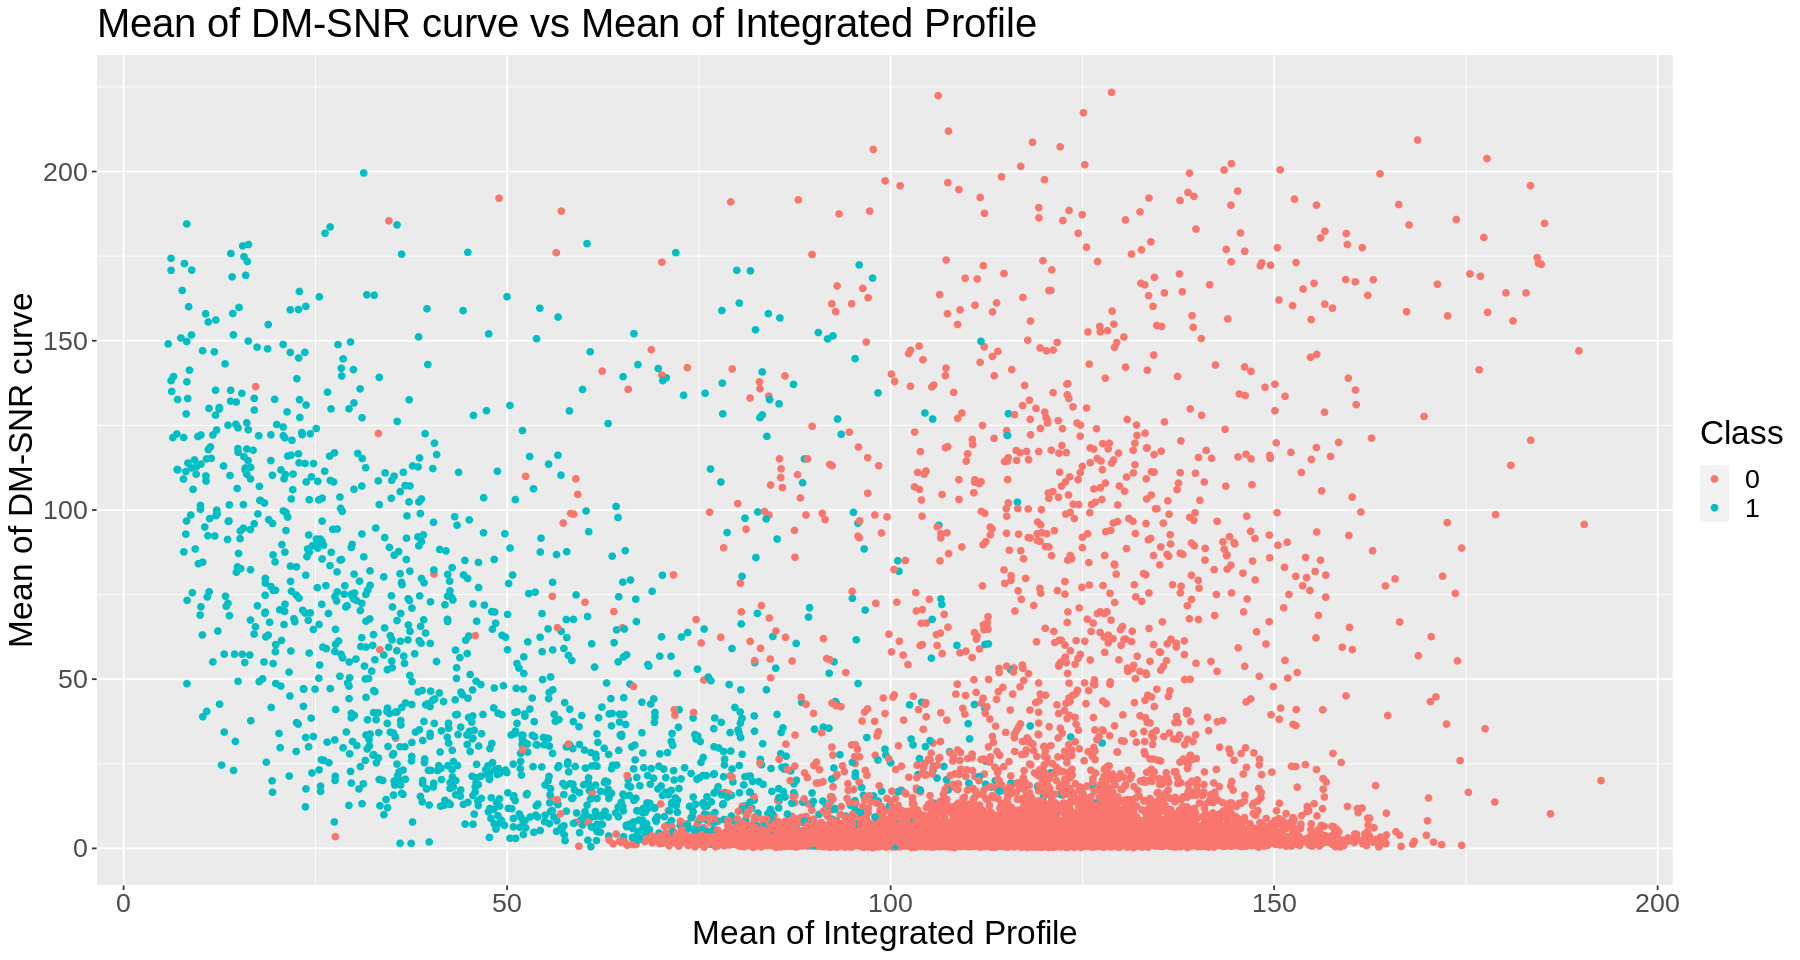

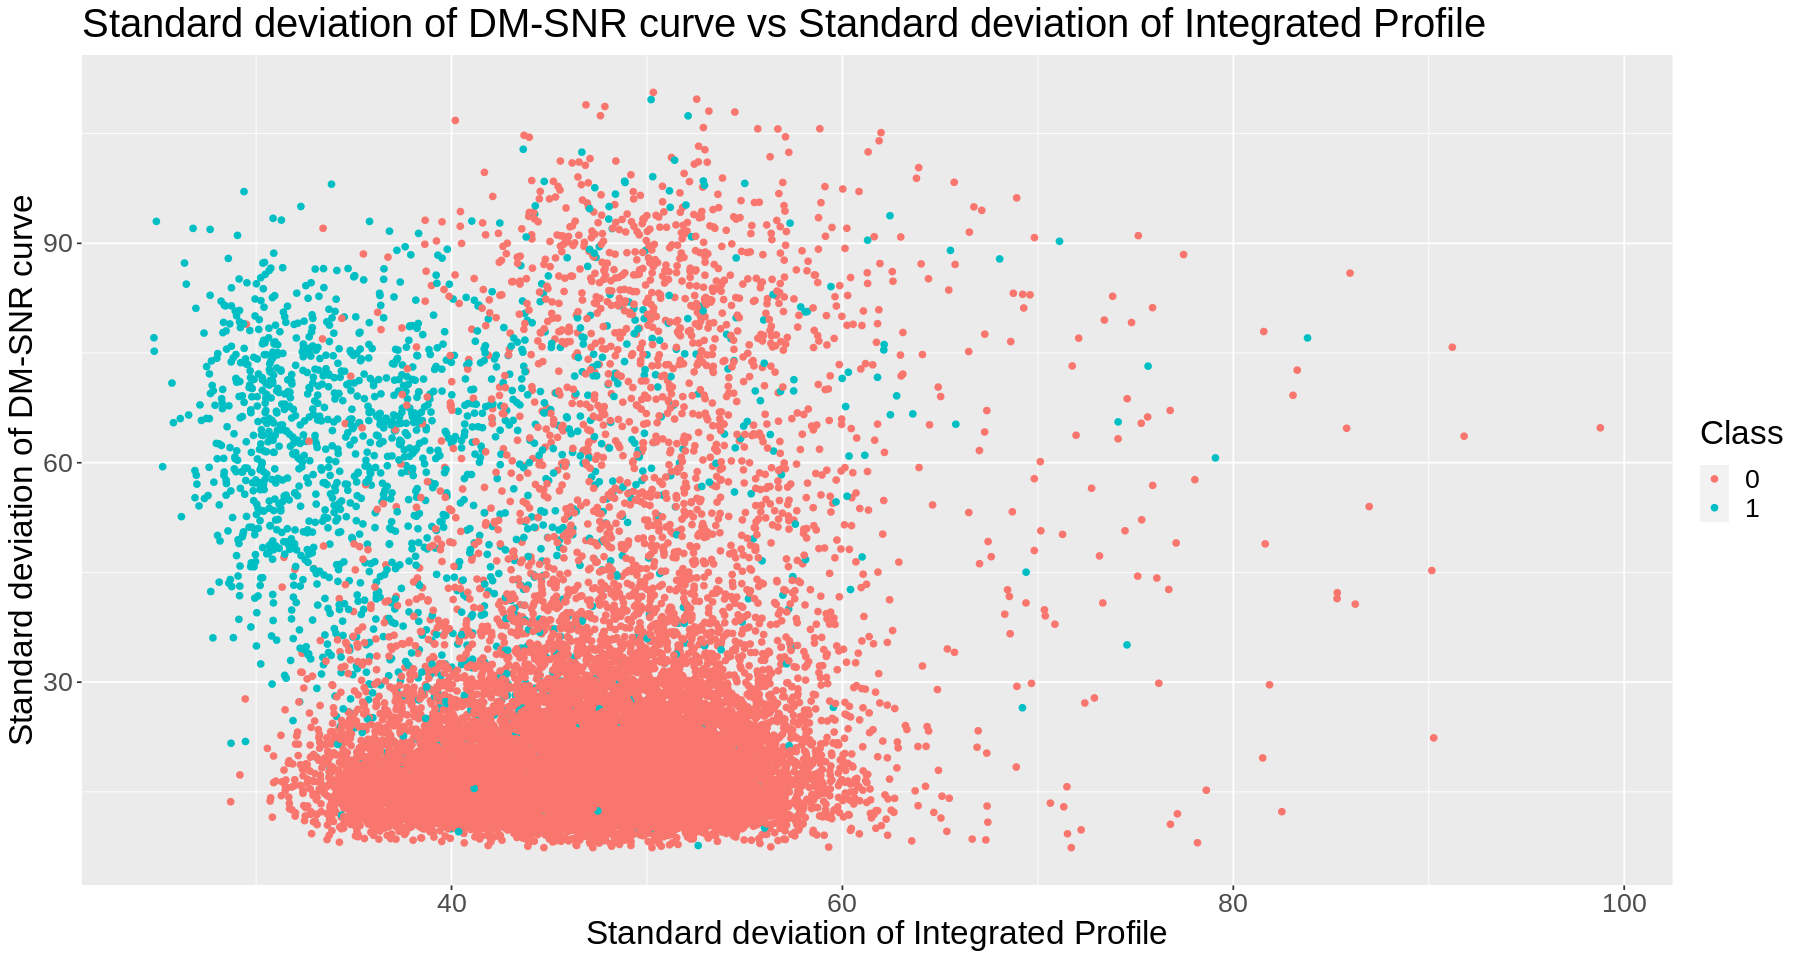

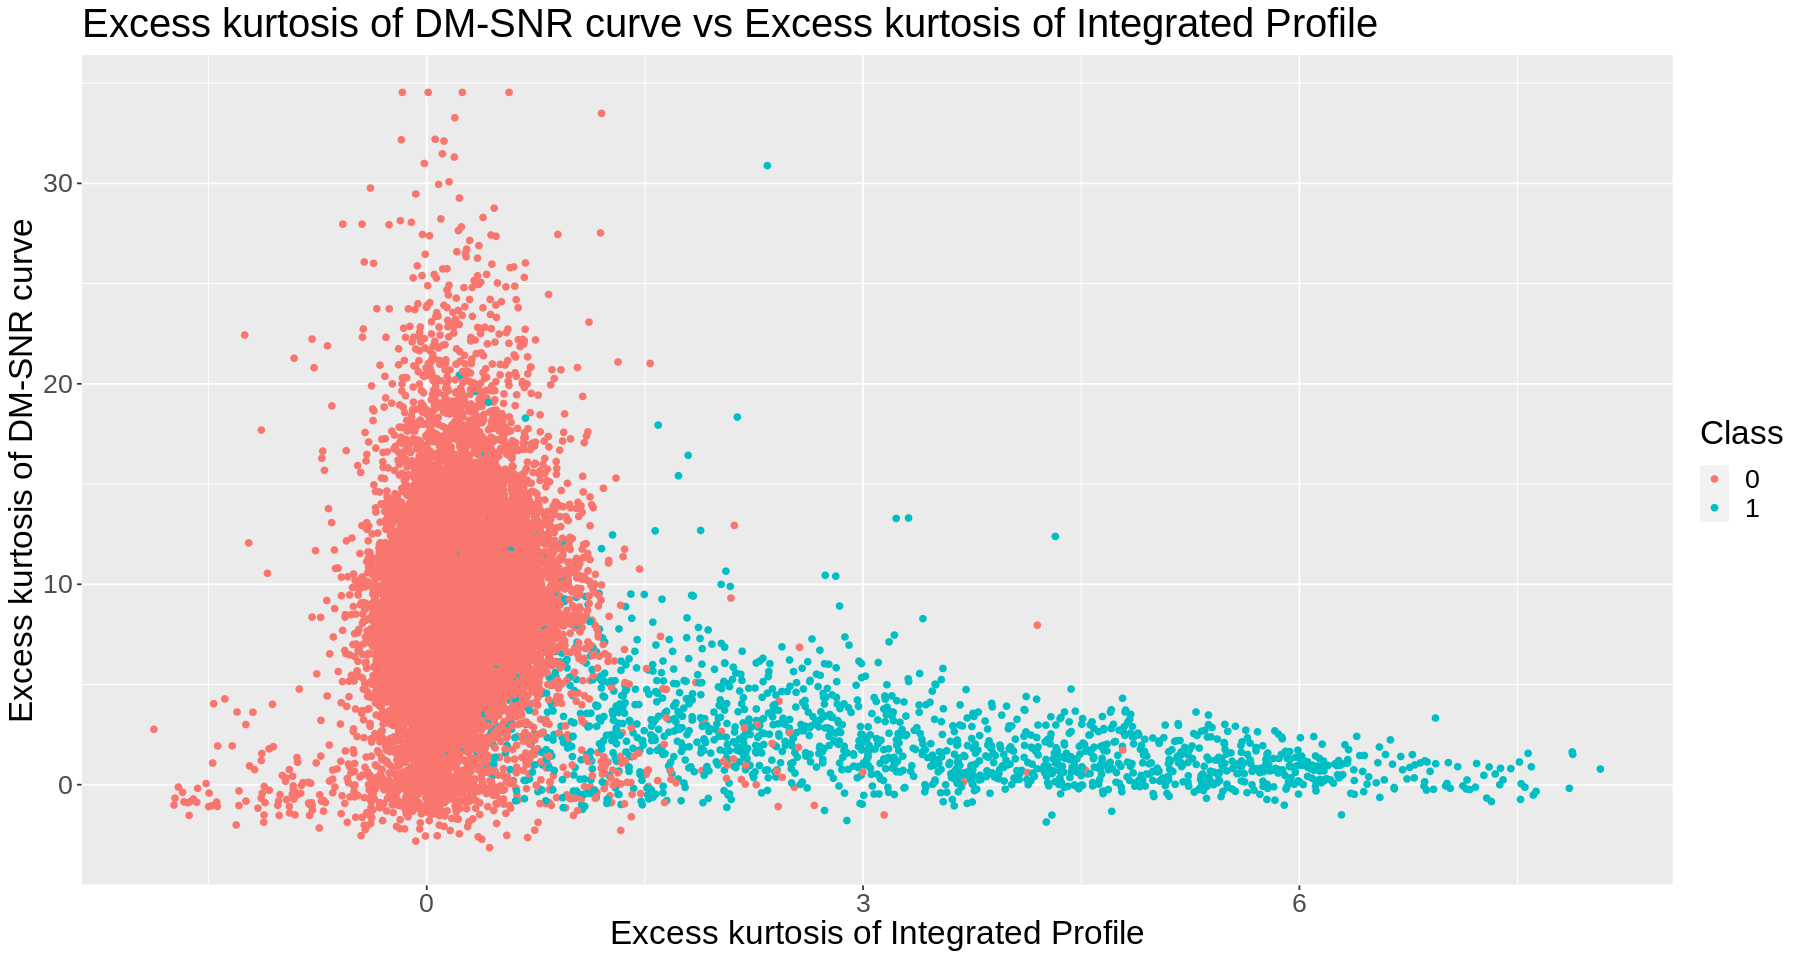

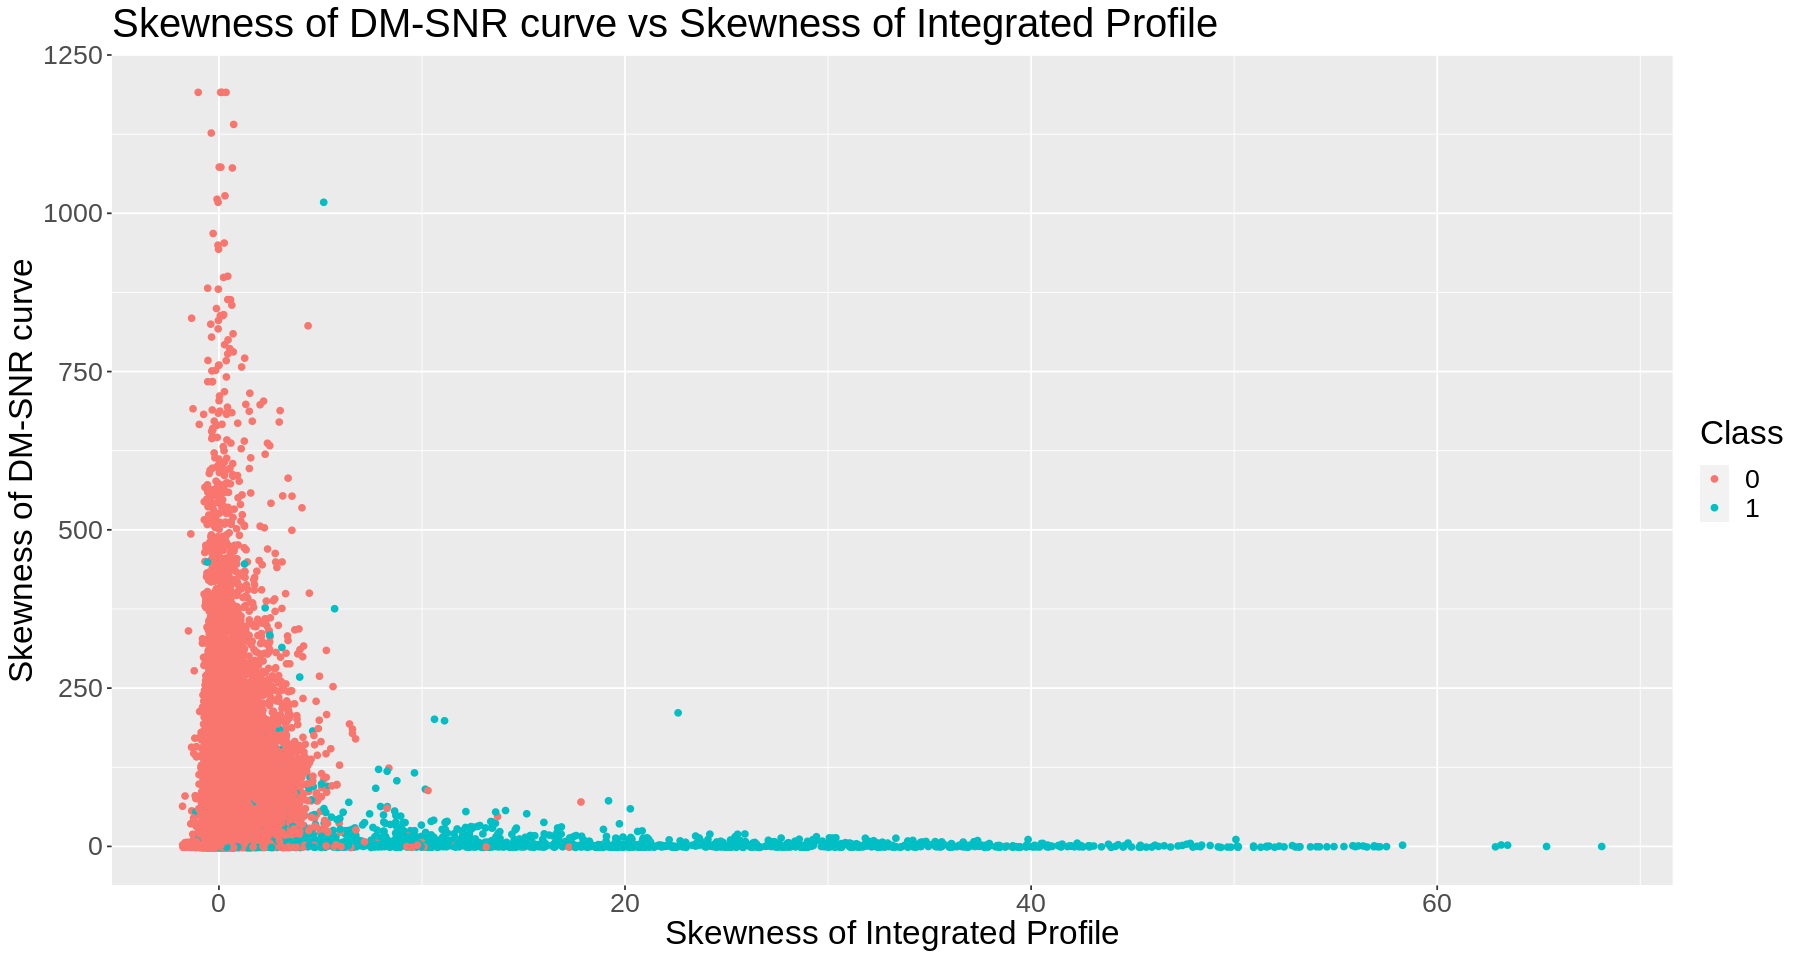

In [66]:
#Plotting scatterplots for each set of variable namely

options(repr.plot.width = 15, repr.plot.height = 8)

means_plot <- pulsar_data %>%
                ggplot(aes(x = mean_ip, y = mean_dm, color = class)) +
                geom_point() +
                labs(x = "Mean of Integrated Profile", y = "Mean of DM-SNR curve", color = "Class") +
                ggtitle("Mean of DM-SNR curve vs Mean of Integrated Profile") +
                theme(text = element_text(size = 20))
means_plot


std_dev_plot <- pulsar_data %>%
                ggplot(aes(x = std_dev_ip, y = std_dev_dm, color = class)) +
                geom_point() +
                labs(x = "Standard deviation of Integrated Profile", y = "Standard deviation of DM-SNR curve", color = "Class") +
                ggtitle("Standard deviation of DM-SNR curve vs Standard deviation of Integrated Profile") +
                theme(text = element_text(size = 20))
std_dev_plot


excess_kurtosis_plot <- pulsar_data %>%
                ggplot(aes(x = excess_kurtosis_ip, y = excess_kurtosis_dm, color = class)) +
                geom_point() +
                labs(x = "Excess kurtosis of Integrated Profile", y = "Excess kurtosis of DM-SNR curve", color = "Class") +
                ggtitle("Excess kurtosis of DM-SNR curve vs Excess kurtosis of Integrated Profile") +
                theme(text = element_text(size = 20))
excess_kurtosis_plot

skewness_plot <- pulsar_data %>%
                ggplot(aes(x = skewness_ip, y = skewness_dm, color = class)) +
                geom_point() +
                labs(x = "Skewness of Integrated Profile", y = "Skewness of DM-SNR curve", color = "Class") +
                ggtitle("Skewness of DM-SNR curve vs Skewness of Integrated Profile") +
                theme(text = element_text(size = 20))
skewness_plot


3. Finding the most accurate set of variables

(i) Splitting our data into training and testing sets

(ii) Cross-validation


In [67]:
set.seed(2020)

#Splitting our data

pulsar_split <- initial_split(pulsar_data, prop = 0.75, strata = class)  
pulsar_training_data <- training(pulsar_split)   
pulsar_testing_data <- testing(pulsar_split)

#Cross validation
pulsar_vfold <- vfold_cv(pulsar_training_data, v = 5, strata = class)

#Accuracy vs k for Means of Integrated Profile and DM-SNR curve"

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
       set_engine("kknn") %>%
       set_mode("classification")

pulsar_mean_recipe <- recipe(class ~ mean_ip + mean_dm , data = pulsar_training_data) %>%
     step_scale(all_predictors())%>%
     step_center(all_predictors())

knn_mean_results <- workflow() %>%
       add_recipe(pulsar_mean_recipe) %>%
       add_model(knn_spec) %>%
       tune_grid(resamples = pulsar_vfold, grid = 10) %>%
       collect_metrics()

mean_accuracies <- knn_mean_results %>% 
       filter(.metric == "accuracy")

mean_accuracy_versus_k <- ggplot(mean_accuracies, aes(x = neighbors, y = mean)) +
       geom_point() +
       geom_line() +
       labs(x = "Neighbors", y = "Accuracy Estimate") +
       ggtitle("Accuracy vs k for Means of Integrated Profile and DM-SNR curve") +
       theme(text = element_text(size = 20)) +
       scale_x_continuous(breaks = seq(0, 14, by = 1)) + 
       scale_y_continuous(limits = c(0.4, 1.0))                         

In [68]:
#Accuracy vs k for Standard deviation of Integrated Profile and DM-SNR curve"

pulsar_std_dev_recipe <- recipe(class ~ std_dev_ip + std_dev_dm , data = pulsar_training_data) %>%
     step_scale(all_predictors())%>%
     step_center(all_predictors())

knn_std_dev_results <- workflow() %>%
       add_recipe(pulsar_std_dev_recipe) %>%
       add_model(knn_spec) %>%
       tune_grid(resamples = pulsar_vfold, grid = 10) %>%
       collect_metrics()

std_dev_accuracies <- knn_std_dev_results %>% 
       filter(.metric == "accuracy")

std_dev_accuracy_versus_k <- ggplot(std_dev_accuracies, aes(x = neighbors, y = mean)) +
       geom_point() +
       geom_line() +
       labs(x = "Neighbors", y = "Accuracy Estimate") +
       ggtitle("Accuracy vs k for Standard deviation of Integrated Profile and DM-SNR curve") +
       theme(text = element_text(size = 20)) +
       scale_x_continuous(breaks = seq(0, 14, by = 1)) + 
       scale_y_continuous(limits = c(0.4, 1.0))                         

In [69]:
#Accuracy vs k for Excess kurtosis of Integrated Profile and DM-SNR curve"

pulsar_kurtosis_recipe <- recipe(class ~ excess_kurtosis_ip + excess_kurtosis_dm , data = pulsar_training_data) %>%
     step_scale(all_predictors())%>%
     step_center(all_predictors())

knn_kurtosis_results <- workflow() %>%
       add_recipe(pulsar_kurtosis_recipe) %>%
       add_model(knn_spec) %>%
       tune_grid(resamples = pulsar_vfold, grid = 10) %>%
       collect_metrics()

kurtosis_accuracies <- knn_kurtosis_results %>% 
       filter(.metric == "accuracy")

kurtosis_accuracy_versus_k <- ggplot(kurtosis_accuracies, aes(x = neighbors, y = mean)) +
       geom_point() +
       geom_line() +
       labs(x = "Neighbors", y = "Accuracy Estimate") +
       ggtitle("Accuracy vs k for Excess kurtosis of Integrated Profile and DM-SNR curve") +
       theme(text = element_text(size = 20)) +
       scale_x_continuous(breaks = seq(0, 14, by = 1)) + 
       scale_y_continuous(limits = c(0.4, 1.0))                         

In [70]:
#Accuracy vs k for Skewness of Integrated Profile and DM-SNR curve"

pulsar_skewness_recipe <- recipe(class ~ skewness_ip + skewness_dm , data = pulsar_training_data) %>%
     step_scale(all_predictors())%>%
     step_center(all_predictors())

knn_skewness_results <- workflow() %>%
       add_recipe(pulsar_skewness_recipe) %>%
       add_model(knn_spec) %>%
       tune_grid(resamples = pulsar_vfold, grid = 10) %>%
       collect_metrics()

skewness_accuracies <- knn_skewness_results %>% 
       filter(.metric == "accuracy")

skewness_accuracy_versus_k <- ggplot(skewness_accuracies, aes(x = neighbors, y = mean)) +
       geom_point() +
       geom_line() +
       labs(x = "Neighbors", y = "Accuracy Estimate") +
       ggtitle("Accuracy vs k for Skewness of Integrated Profile and DM-SNR curve") +
       theme(text = element_text(size = 20)) +
       scale_x_continuous(breaks = seq(0, 14, by = 1)) + 
       scale_y_continuous(limits = c(0.4, 1.0))                         

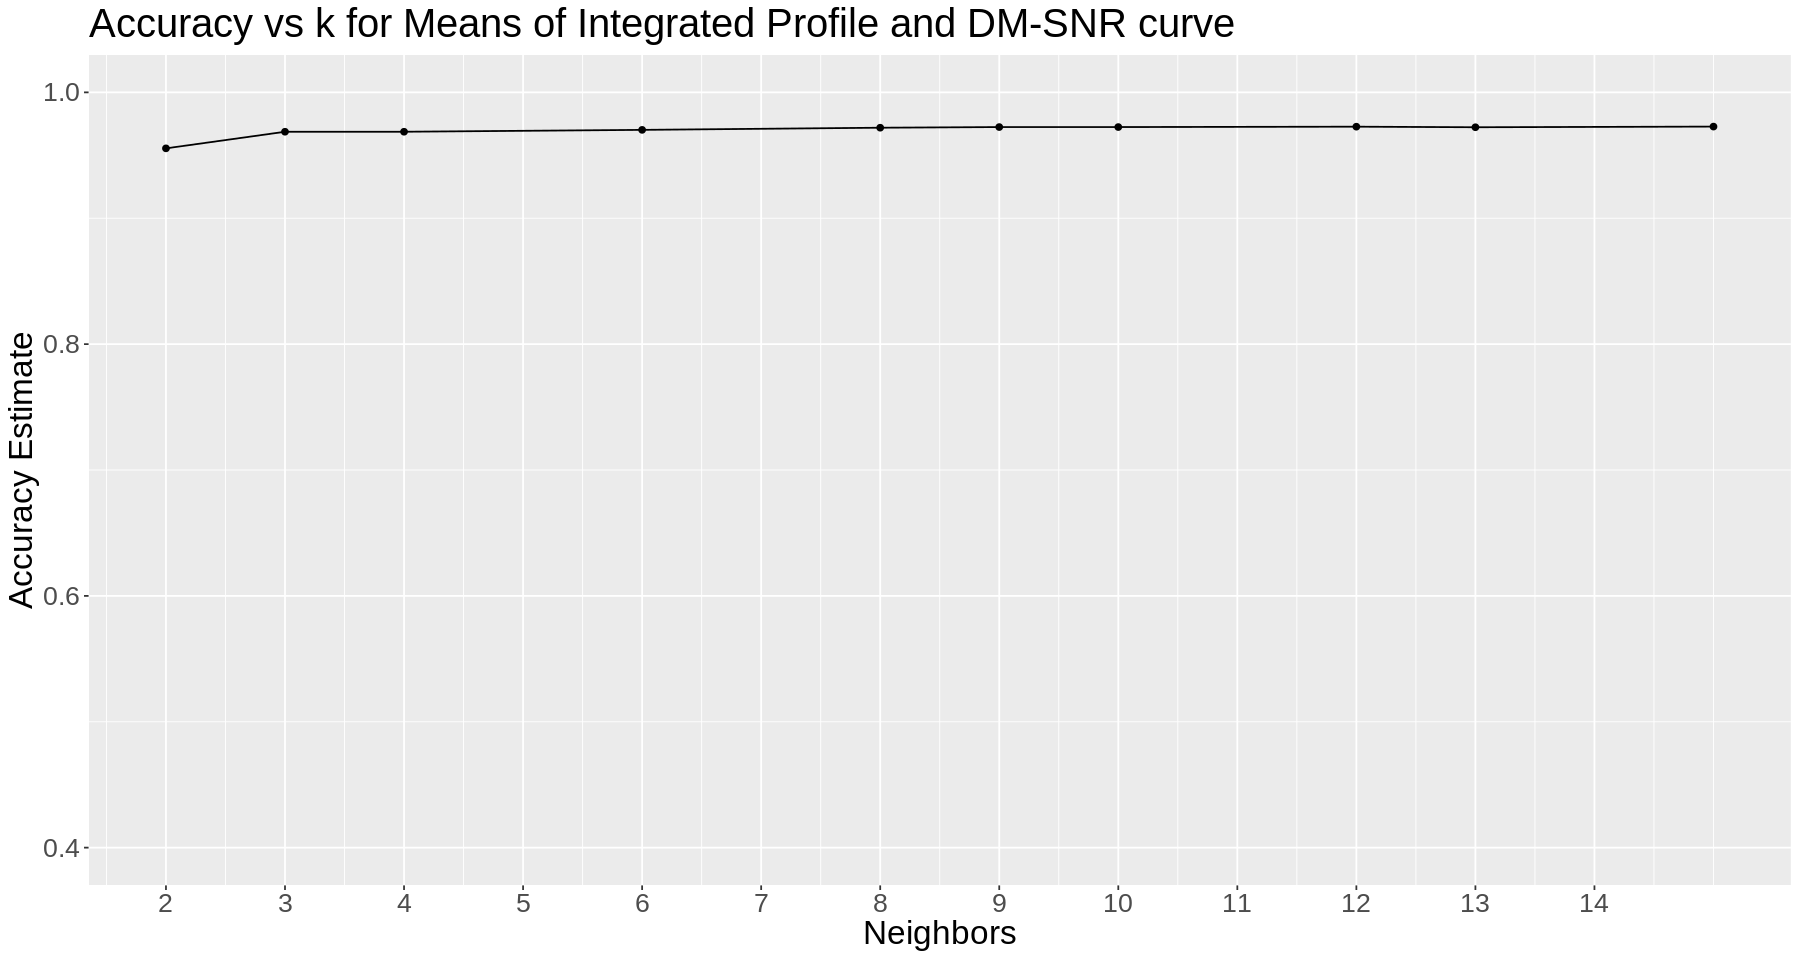

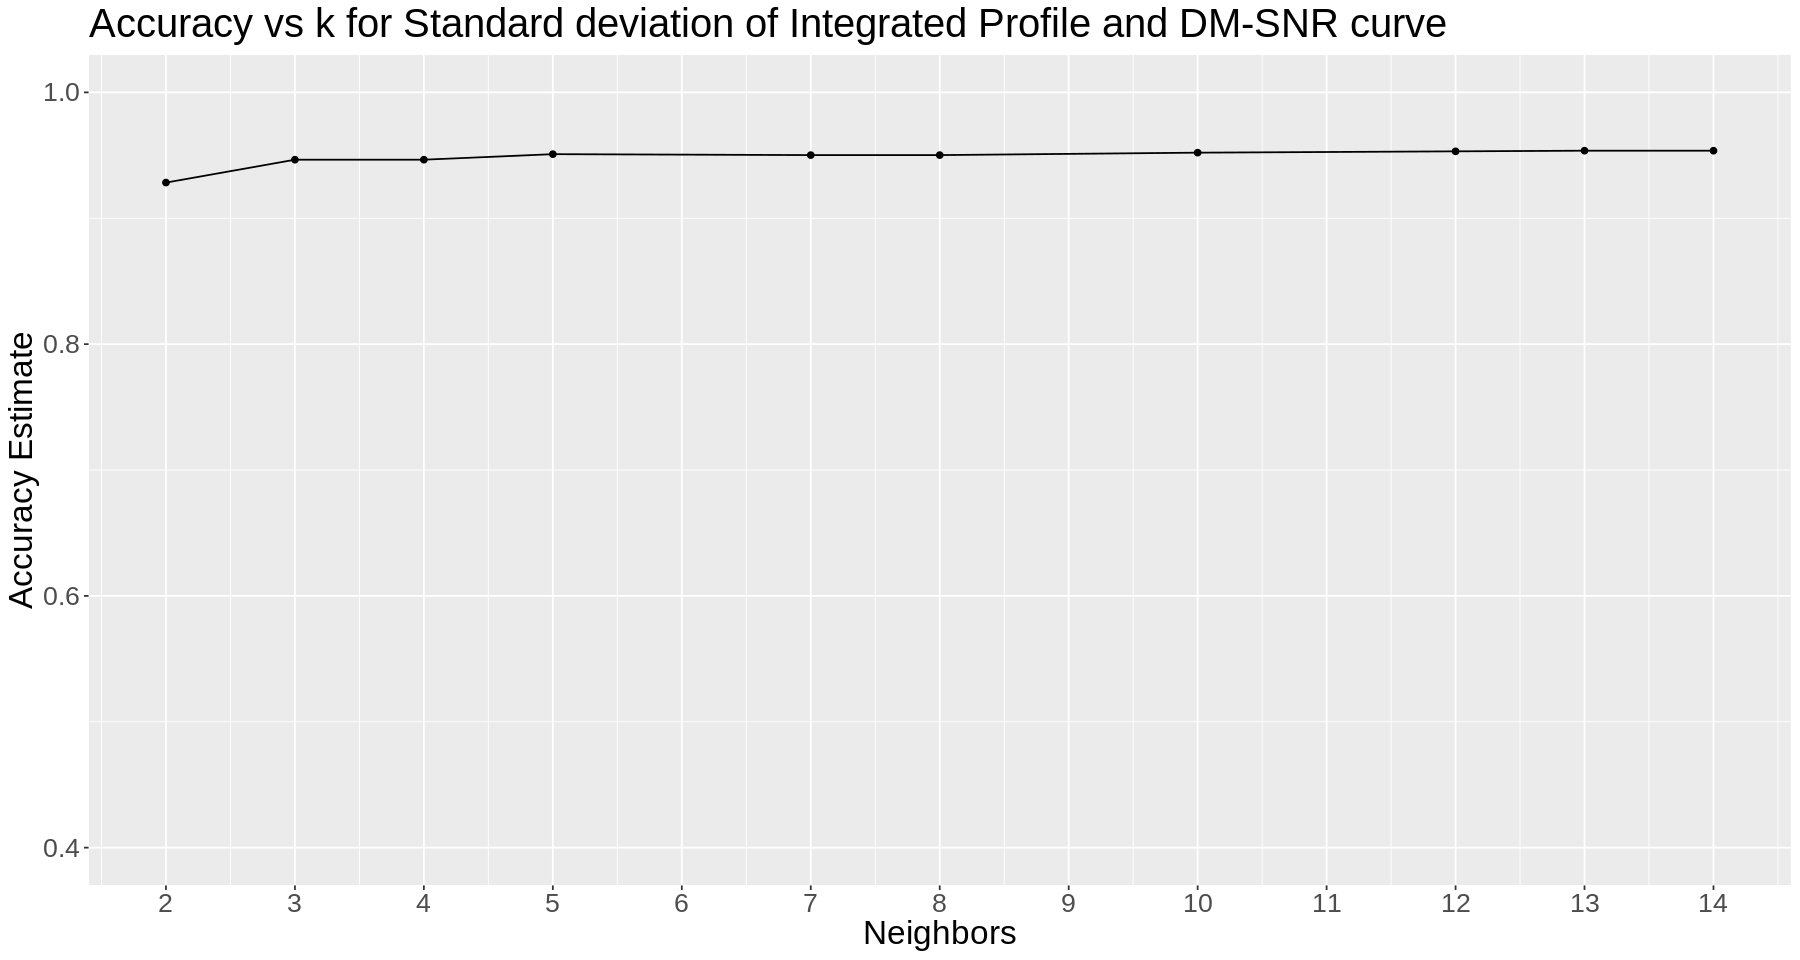

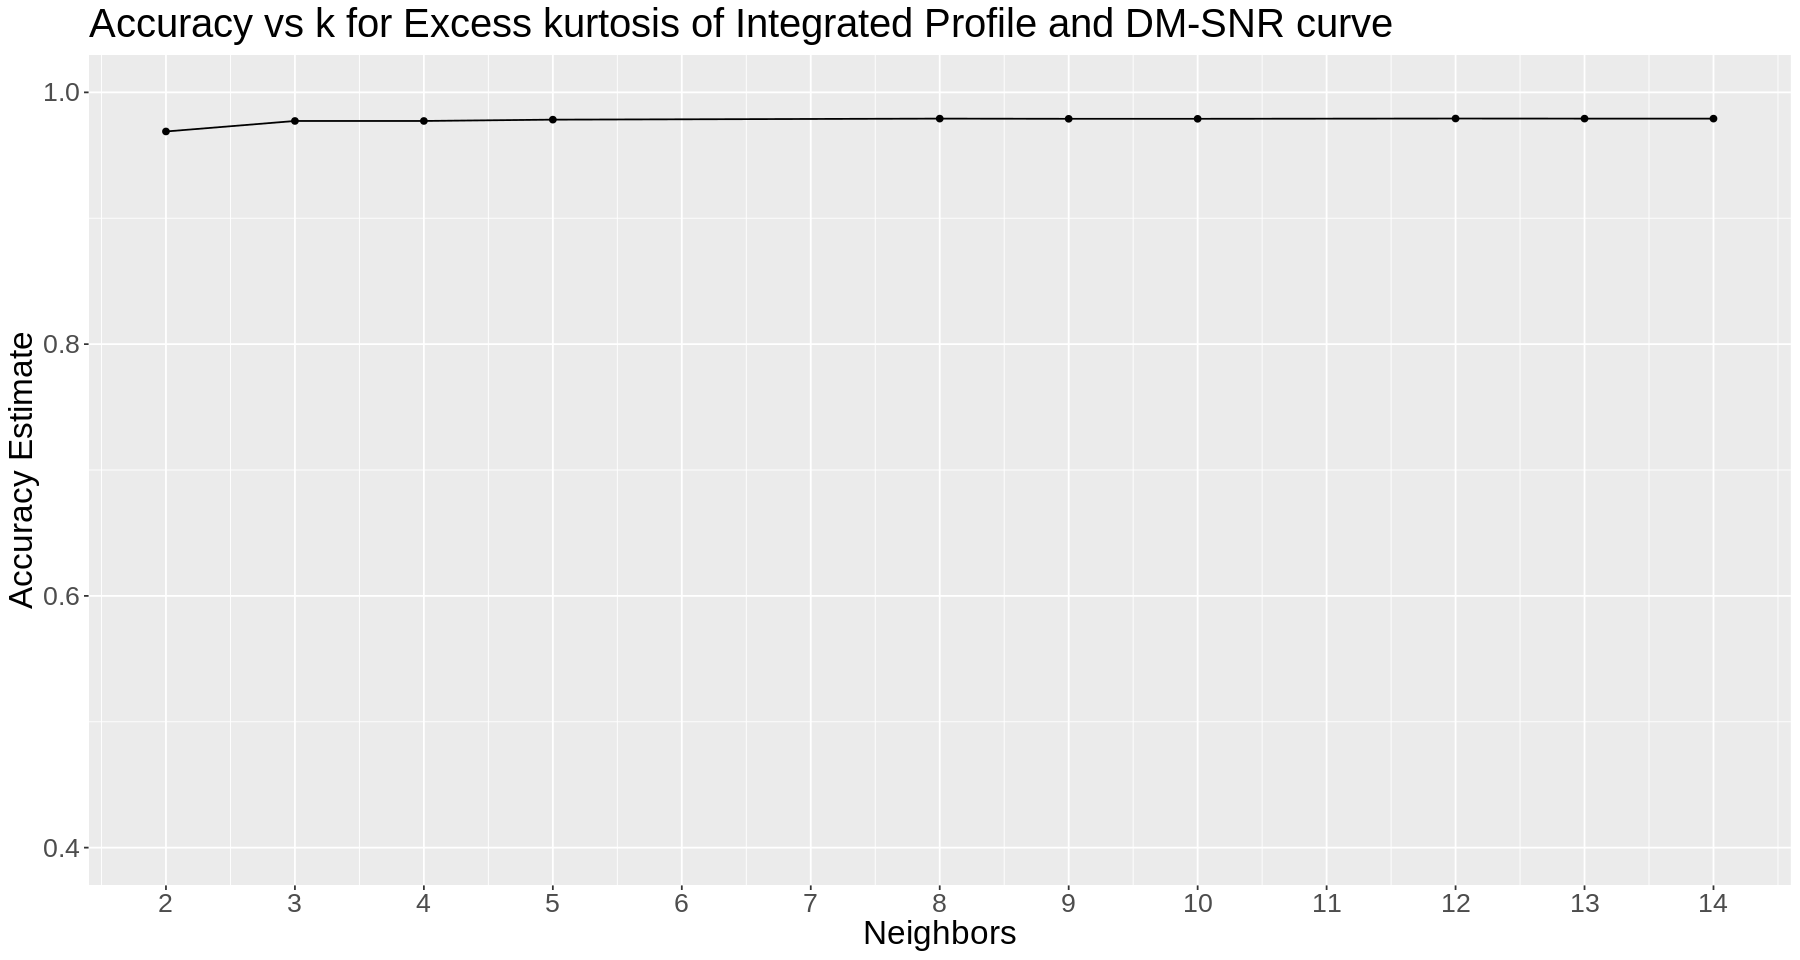

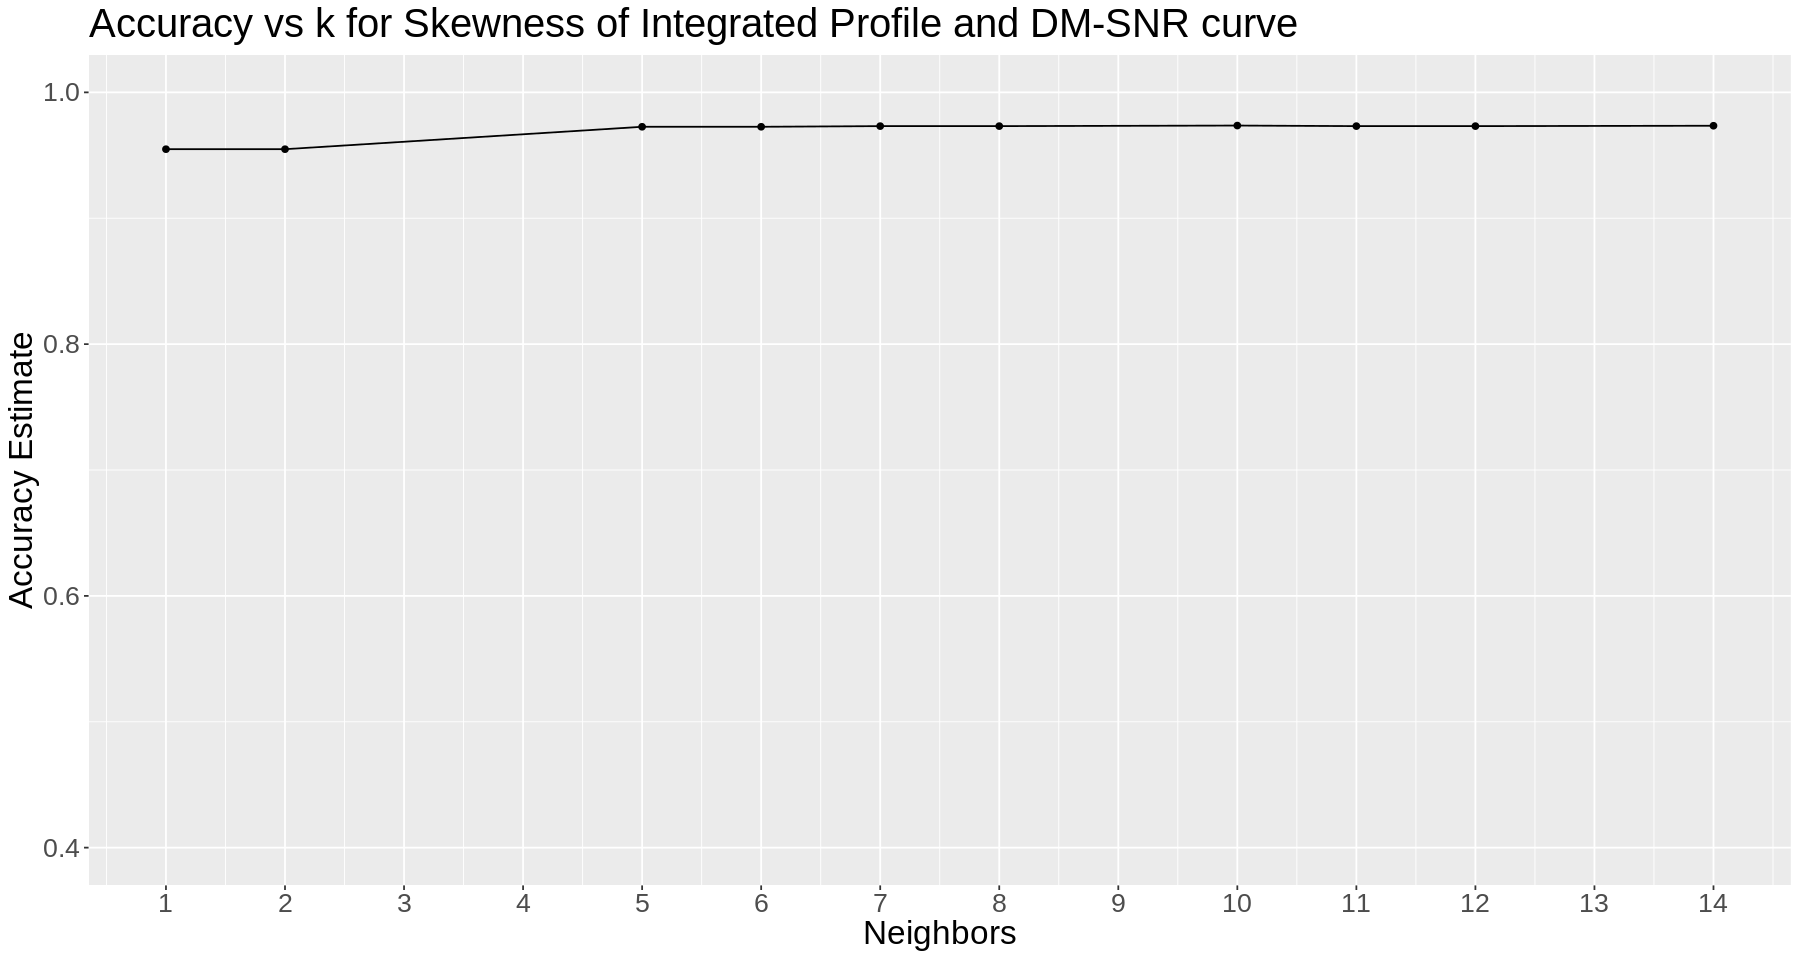

In [71]:
#Plotting Accuracy vs k for each set of variables

mean_accuracy_versus_k
std_dev_accuracy_versus_k
kurtosis_accuracy_versus_k
skewness_accuracy_versus_k

In [72]:
#Building our model based on means dataset

pulsar_model_spec <- nearest_neighbor(weight_func = "rectangular", neighbor = 10) %>%
                set_engine("kknn") %>%
                set_mode("classification")

pulsar_model_fit <- workflow() %>%
            add_recipe(pulsar_mean_recipe) %>%
            add_model(pulsar_model_spec) %>%
            fit(data = pulsar_training_data)

pulsar_predictions <- predict(pulsar_model_fit, pulsar_testing_data) %>%
                        bind_cols(pulsar_testing_data)

pulsar_metrics <- pulsar_predictions %>%
                    metrics(truth = class, estimate = .pred_class)
pulsar_metrics

pulsar_conf_mat <- pulsar_predictions %>%
                    conf_mat(truth = class, estimate = .pred_class)
pulsar_conf_mat

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.9720608
kap,binary,0.8175556


          Truth
Prediction    0    1
         0 4038   96
         1   29  311